In [4]:
#import sys
#!{sys.executable} -m pip install git+https://github.com/Isidro5004/Casino.git
from casino.montecarlo import Die,Game,Analyzer

# Scenario 1: A 2-headed coin
1. Create a fair coin (with faces H and T) and one unfair coin, in
which one of the faces has a weight of 5 and the others 1.
2. Play a game of 1000 flips with all fair dice.
3. Play a game of 1000 flips with two unfair dice and one fair die.
4. For each game, use an Analyzer object to determine the
relative frequency of jackpots – getting either all Hs or all Ts.
5. Compute relative frequency as the number of jackpots over the
total number of rolls.
6. Show your results, comparing the two relative frequencies, in a
simple bar chart.

<BarContainer object of 2 artists>

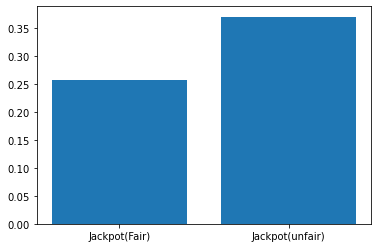

In [5]:
import matplotlib.pyplot as plt
#Create fair and unfair dice with weights
fair = Die(['H','T'])
unfair = Die(['H','T'])
unfair.change_weight('H',5)

#Play 1000 Games
fair_game = Game([fair,fair,fair])
fair_game.play(1000)
fair_game.show()

unfair_game = Game([unfair,unfair,fair])
unfair_game.play(1000)
unfair_game.show()

#Analysis
fair_analysis = Analyzer(fair_game)
fair_jackpot = fair_analysis.jackpot()
fair_freq = fair_jackpot/1000

unfair_analysis = Analyzer(unfair_game)
unfair_jackpot = unfair_analysis.jackpot()
unfair_freq = unfair_jackpot/1000

#Bar Chart
plt.bar(['Jackpot(Fair)', 'Jackpot(unfair)'],[fair_freq, unfair_freq])

# Scenario 2: A 6-sided die
1. Create a fair die and two unfair dice, all of six sides with the
faces 1 through 6. One unfair die (Type 1) will weight 6 five
times more than the others (i.e. it has weight of 5 and the
others a weight of 1 each). The other unfair die (Type 2)
will weight 1 five times more than the others.
2. Play a game of 10000 rolls with 5 fair dice.
3. Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair
die of type 2, and the rest fair dice.
4. For each game, use an Analyzer object to determine the
relative frequency of jackpots and show your results,
comparing the two relative frequencies, in a simple bar chart.
5. Also compute 10 most frequent combinations of faces for each
game. Plot each of these as bar charts.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

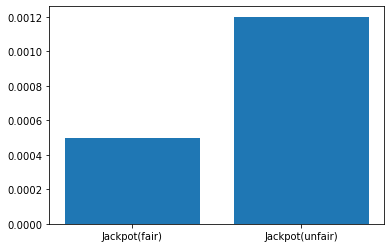

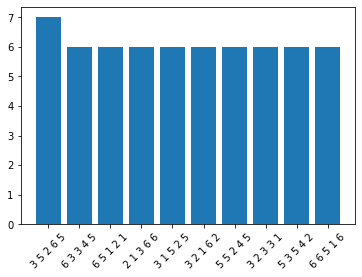

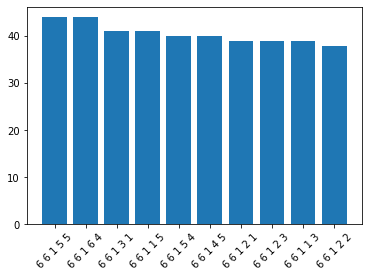

In [25]:
del fair
#Dice creation and mutation
fair = Die([1,2,3,4,5,6])
unfair1 = Die([1,2,3,4,5,6])
unfair2 = Die([1,2,3,4,5,6])
unfair1.change_weight(6,5)
unfair2.change_weight(1,5)

#Play games
fair_game2 = Game([fair,fair,fair,fair,fair])
fair_game2.play(10000)
fair_game2.show()

unfair_game2 = Game([unfair1,unfair1,unfair2,fair,fair])
unfair_game2.play(10000)
unfair_game2.show()

#Analysis
fair_analysis2 = Analyzer(fair_game2)
fair_jackpot2 = fair_analysis2.jackpot()
fair_freq2 = fair_jackpot2/10000
fair_combo = fair_analysis2.combo().nlargest(10,'Combinations')

unfair_analysis2 = Analyzer(unfair_game2)
unfair_jackpot2 = unfair_analysis2.jackpot()
unfair_freq2 = unfair_jackpot2/10000
unfair_combo = unfair_analysis2.combo().nlargest(10,'Combinations')

#Plot
plt.figure(1)
plt.bar(['Jackpot(fair)','Jackpot(unfair)'],[fair_freq2,unfair_freq2])

plt.figure(2)
plt.bar(fair_combo.index.tolist(),np.concatenate(fair_combo.values.tolist()))
plt.xticks(rotation = 45)

plt.figure(3)
plt.bar(unfair_combo.index.tolist(),np.concatenate(unfair_combo.values.tolist()))
plt.xticks(rotation = 45)

# Scendario 3: Letters of the Roman Alpha
1. Create a "die" of letters from a to z with weights based on their frequency of usage.
2. Play a game involving 5 of these dice with 1000 rolls. How many combos can you that look like actual English words? 
4. NOTE: "combo" here just means resulting sequence, not literally combination as opposed to permutation.
3. Based on your eye count, what is the relative frequency of these words versus the rest? 
5. Note: the Notebook will supply the weights for the letters.


In [27]:
atoz = [chr(c) for c in range(ord('A'),ord('Z')+1)]
abc = Die(atoz)
abc_weight = [8.4966,2.0720,4.5388,3.3844,11.1607,1.8121,2.4705,3.0034,7.5448,0.1965,1.1016,5.4893,3.0129,6.6544,7.1635,3.1671,0.1962,7.5809,5.7351,6.9509,3.6308,1.0074,1.2899,0.2902,1.7779,0.2722]
for i in range(0,26):
    abc.change_weight(atoz[i],abc_weight[i])

abc_game = Game([abc,abc,abc,abc,abc])
abc_game.play(1000)
abc_game.show()
abc_analysis = Analyzer(abc_game)
abc_words = abc_analysis.combo()
print('There were about 5 real words that I saw.')
abc_freq = 5/len(abc_words)
print(f'The frequency of real words generated is {abc_freq}')

There were about 5 real words that I saw.
The frequency of real words generated is 0.005005005005005005
